# Deep Learning

forward propagation

In [2]:
import numpy as np
import math
b1=0 #bias unit 1
b2=0 #bias unit 2

def sigmoid(x):      # sigmoid function
    return 1 /(1+(math.e**-x))

def softmax(x):     #softmax function
    l_exp = np.exp(x)
    sm = l_exp/np.sum(l_exp, axis=0)
    return sm
    
# input dataset with 3 features
X = np.array([  [.35,.21,.33],
            	[.2,.4,.3],
            	[.4,.34,.5],
            	[.18,.21,16] ])
len_X = len(X) # training set size
input_dim = 3 # input layer dimensionality
output_dim = 1 # output layer dimensionality
hidden_units=4
  
np.random.seed(22)
# create random weight vectors
theta0 = 2*np.random.random((input_dim, hidden_units))
theta1 = 2*np.random.random((hidden_units, output_dim))

# forward propagation pass
d1 = X.dot(theta0)+b1
l1=sigmoid(d1)
l2 = l1.dot(theta1)+b2
#let’s apply softmax to the output of the final layer
output=softmax(l2)

Backpropagation 

In [2]:
import numpy as np
import math
def sigmoid(x):      # sigmoid function
	return 1 /(1+(math.e**-x))

def deriv_sigmoid(y): #the derivative of the sigmoid function
    return y * (1.0 - y)   
    
alpha=.1    #this is the learning rate
X = np.array([  [.35,.21,.33],
            	[.2,.4,.3],
            	[.4,.34,.5],
            	[.18,.21,16] ])                
y = np.array([[0],
		[1],
		[1],
		[0]])
np.random.seed(1)
#We randomly initialize the layers
theta0 = 2*np.random.random((3,4)) - 1
theta1 = 2*np.random.random((4,1)) - 1

for iter in range(205000): #here we specify the amount of training rounds.
	# Feedforward the input like we did in the previous exercise
    input_layer = X
    l1 = sigmoid(np.dot(input_layer,theta0))
    l2 = sigmoid(np.dot(l1,theta1))

    # Calculate error 
    l2_error = y - l2
    
    if (iter% 1000) == 0:
        print "Neuralnet accuracy:" + str(np.mean(1-(np.abs(l2_error))))
        
    # Calculate the gradients in vectorized form 
    # Softmax and bias units are left out for instructional simplicity
    l2_delta = alpha*(l2_error*deriv_sigmoid(l2))
    l1_error = l2_delta.dot(theta1.T)
    l1_delta = alpha*(l1_error * deriv_sigmoid(l1))

    theta1 += l1.T.dot(l2_delta)
    theta0 += input_layer.T.dot(l1_delta)

Neuralnet accuracy:0.446475342875
Neuralnet accuracy:0.625318046022
Neuralnet accuracy:0.639273569828
Neuralnet accuracy:0.646973337655
Neuralnet accuracy:0.65355100446
Neuralnet accuracy:0.660011060327
Neuralnet accuracy:0.666798132376
Neuralnet accuracy:0.674498860374
Neuralnet accuracy:0.684028475313
Neuralnet accuracy:0.696299738928
Neuralnet accuracy:0.711746799387
Neuralnet accuracy:0.730046564033
Neuralnet accuracy:0.750090593059
Neuralnet accuracy:0.770419774119
Neuralnet accuracy:0.789971860781
Neuralnet accuracy:0.808263092189
Neuralnet accuracy:0.824566058728
Neuralnet accuracy:0.838737531167
Neuralnet accuracy:0.851026112067
Neuralnet accuracy:0.861691314965
Neuralnet accuracy:0.870967069843
Neuralnet accuracy:0.87906528131
Neuralnet accuracy:0.886172293348
Neuralnet accuracy:0.892445776114
Neuralnet accuracy:0.898016226232
Neuralnet accuracy:0.902990776676
Neuralnet accuracy:0.907457318163
Neuralnet accuracy:0.9114881652
Neuralnet accuracy:0.915143094558
Neuralnet accuracy

What & how Neural Networks Learn
(An example with Neurolab)

Epoch: 100; Error: 12.6479818005;
Epoch: 200; Error: 12.6479818005;
Epoch: 300; Error: 12.6479818005;
Epoch: 400; Error: 12.6479818005;
Epoch: 500; Error: 12.6479818005;
Epoch: 600; Error: 12.6479818005;
Epoch: 700; Error: 12.6479818005;
Epoch: 800; Error: 12.6479818005;
Epoch: 900; Error: 12.6479818005;
Epoch: 1000; Error: 12.6479818005;
The maximum number of train epochs is reached


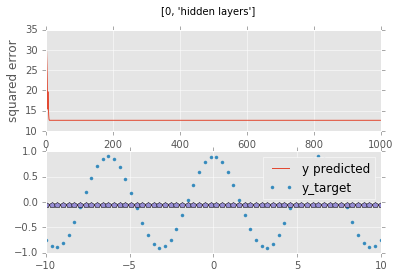

Epoch: 100; Error: 0.552231906541;
Epoch: 200; Error: 1.20218058169;
Epoch: 300; Error: 1.2911547834;
Epoch: 400; Error: 3.23290862361;
Epoch: 500; Error: 1.18917506258;
Epoch: 600; Error: 3.16657985115;
Epoch: 700; Error: 4.33332716553;
Epoch: 800; Error: 3.80467188852;
Epoch: 900; Error: 0.819375694629;
Epoch: 1000; Error: 1.02699018685;
The maximum number of train epochs is reached


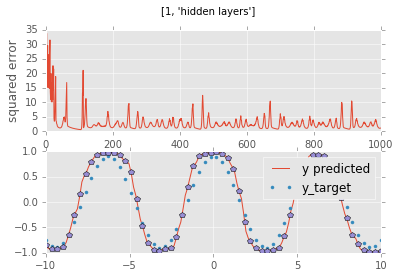

Epoch: 100; Error: 1.03946448656;
Epoch: 200; Error: 0.974936983566;
Epoch: 300; Error: 1.12162549451;
Epoch: 400; Error: 1.13428851447;
Epoch: 500; Error: 0.753649341825;
Epoch: 600; Error: 0.337334407625;
Epoch: 700; Error: 0.254050172086;
Epoch: 800; Error: 0.204371162575;
Epoch: 900; Error: 0.38889500755;
Epoch: 1000; Error: 0.108565229646;
The maximum number of train epochs is reached


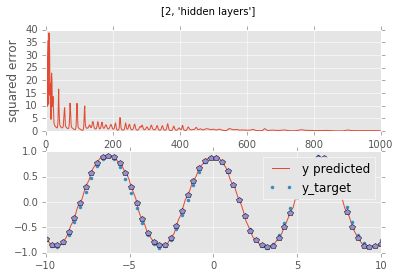

Epoch: 100; Error: 0.259408204242;
Epoch: 200; Error: 1.0044206096;
Epoch: 300; Error: 0.478278530134;
Epoch: 400; Error: 0.159444646393;
Epoch: 500; Error: 0.197078063801;
Epoch: 600; Error: 0.0569368521348;
Epoch: 700; Error: 0.113623391531;
Epoch: 800; Error: 0.0546892295386;
Epoch: 900; Error: 0.0767925871979;
Epoch: 1000; Error: 0.0202113078078;
The maximum number of train epochs is reached


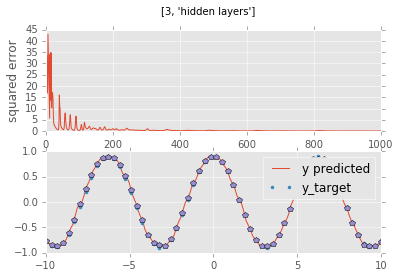

In [4]:
import neurolab as nl
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
# Create train samples
x = np.linspace(-10,10, 60)
y = np.cos(x) * 0.9
size = len(x)
x_train = x.reshape(size,1)
y_train = y.reshape(size,1)

# Create network with 4 layers and random initialized
# just experiment with the amount of layers

d=[[1,1],[45,1],[45,45,1],[45,45,45,1]]
for i in range(4):
    net = nl.net.newff([[-10, 10]],d[i])
    train_net=nl.train.train_gd(net, x_train, y_train, epochs=1000, show=100)
    outp=net.sim(x_train)
# Plot results (dual plot with error curve and predicted values)
    import matplotlib.pyplot 
    plt.subplot(2, 1, 1)
    plt.plot(train_net)
    plt.xlabel('Epochs')
    plt.ylabel('squared error')
    x2 = np.linspace(-10.0,10.0,150)
    y2 = net.sim(x2.reshape(x2.size,1)).reshape(x2.size)
    y3 = outp.reshape(size)
    plt.subplot(2, 1, 2)

    plt.suptitle([i ,'hidden layers'])
    plt.plot(x2, y2, '-',x , y, '.', x, y3, 'p')
    plt.legend(['y predicted', 'y_target'])
    plt.show()

# Neural Networks with SKNN in Action

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sknn.mlp import Classifier, Layer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score 
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import datasets

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
iris.target, test_size=0.2, random_state=0)


X_trainn = preprocessing.normalize(X_train, norm='l2')
X_testn = preprocessing.normalize(X_test, norm='l2')

X_trainn = preprocessing.scale(X_trainn)
X_testn = preprocessing.scale(X_testn)

clf = Classifier(
	layers=[
    	Layer("Rectifier", units=13),   
    	Layer("Rectifier", units=13),   
    	Layer("Softmax")],    	learning_rate=0.001, learning_rule='sgd',random_state=201,
	n_iter=200)

model1=clf.fit(X_trainn, y_train)
y_hat=clf.predict(X_testn)
scores = cross_validation.cross_val_score(clf, X_trainn, y_train, cv=5)
print 'train mean accuracy %s' % np.mean(scores)
print 'vanilla sgd test %s' % accuracy_score(y_hat,y_test)





I 2016-07-24 09:15:44 sknn:171 Initializing neural network with 3 layers, 4 inputs and 3 outputs.
I 2016-07-24 09:15:45 sknn:213 Training on dataset of 120 samples with 840 total size.
I 2016-07-24 09:15:47 sknn:198 Terminating after specified 200 total iterations.
I 2016-07-24 09:15:48 sknn:171 Initializing neural network with 3 layers, 4 inputs and 3 outputs.
I 2016-07-24 09:15:49 sknn:213 Training on dataset of 95 samples with 665 total size.
I 2016-07-24 09:15:51 sknn:198 Terminating after specified 200 total iterations.
I 2016-07-24 09:15:51 sknn:171 Initializing neural network with 3 layers, 4 inputs and 3 outputs.
I 2016-07-24 09:15:52 sknn:213 Training on dataset of 95 samples with 665 total size.
I 2016-07-24 09:15:54 sknn:198 Terminating after specified 200 total iterations.
I 2016-07-24 09:15:54 sknn:171 Initializing neural network with 3 layers, 4 inputs and 3 outputs.
I 2016-07-24 09:15:55 sknn:213 Training on dataset of 96 samples with 672 total size.
I 2016-07-24 09:15:5

Nesterov momentum 

In [3]:
clf = Classifier(
	layers=[
    	Layer("Rectifier", units=13),   
    	Layer("Rectifier", units=13),   
    	Layer("Softmax")],    	learning_rate=0.001,learning_rule='nesterov',random_state=101,
	n_iter=1000)

model1=clf.fit(X_trainn, y_train)
y_hat=clf.predict(X_testn)
scores = cross_validation.cross_val_score(clf, X_trainn, y_train, cv=5)
print 'Nesterov train mean accuracy %s' % np.mean(scores)
print 'Nesterov  test %s' % accuracy_score(y_hat,y_test)

Nesterov train mean accuracy 0.966575757576
Nesterov  test 0.966666666667


Dropout regularization

In [6]:
clf = Classifier(
	layers=[
    	Layer("Rectifier", units=13),
    	Layer("Rectifier", units=13),
    	Layer("Softmax")],
	learning_rate=0.01,
	n_iter=2000,
	learning_rule='nesterov',
	regularize='dropout', #here we specify dropout
	dropout_rate=.1,#dropout fraction of neural units in entire network
	random_state=0)
model1=clf.fit(X_trainn, y_train)

scores = cross_validation.cross_val_score(clf, X_trainn, y_train, cv=5)
print np.mean(scores)
y_hat=clf.predict(X_testn)
print accuracy_score(y_hat,y_test)

0.958242424242
0.833333333333


Deep Learning & Hyper parameter optimization 

In [ ]:
import numpy as np
import scipy as sp 
import pandas as pd
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from scipy import stats
from sklearn.cross_validation import train_test_split
from sknn.mlp import  Layer, Regressor, Classifier as skClassifier


# Load data
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
X = df.drop('quality', 1).values # drop target variable
   

y1 = df['quality'].values # original target variable
y = y1 <= 5 # new target variable: is the rating <= 5?

# Split the data into a test set and a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print X_train.shape


max_net = skClassifier(layers= [Layer("Rectifier",units=1),
                                       Layer("Rectifier",units=1),
                                       Layer("Rectifier",units=1),
                                       Layer("Softmax")])
params={'learning_rate': [.002],
        'hidden0__units': sp.stats.randint(8, 20),
        'hidden0__type': ["Rectifier"],
        'hidden1__units': sp.stats.randint(8, 20),
        'hidden1__type': ["Rectifier"],
        'learning_rule':["adam","rmsprop","sgd"]}
max_net2 = RandomizedSearchCV(max_net,param_distributions=params,n_iter=10,cv=3,random_state=101,scoring='accuracy',verbose=10,\
                             pre_dispatch=None)
model_tuning=max_net2.fit(X_train,y_train)



print "best score %s" % model_tuning.best_score_
print "best parameters %s" % model_tuning.best_params_

(1279, 11)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] hidden0__units=15, learning_rate=0.002, hidden1__units=16, learning_rule=rmsprop, hidden1__type=Rectifier, hidden0__type=Rectifier 
[CV]  hidden0__units=15, learning_rate=0.002, hidden1__units=16, learning_rule=rmsprop, hidden1__type=Rectifier, hidden0__type=Rectifier, score=0.529274 -  12.9s
[CV] hidden0__units=15, learning_rate=0.002, hidden1__units=16, learning_rule=rmsprop, hidden1__type=Rectifier, hidden0__type=Rectifier 


[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:   12.9s


[CV]  hidden0__units=15, learning_rate=0.002, hidden1__units=16, learning_rule=rmsprop, hidden1__type=Rectifier, hidden0__type=Rectifier, score=0.528169 -   7.9s
[CV] hidden0__units=15, learning_rate=0.002, hidden1__units=16, learning_rule=rmsprop, hidden1__type=Rectifier, hidden0__type=Rectifier 
[CV]  hidden0__units=15, learning_rate=0.002, hidden1__units=16, learning_rule=rmsprop, hidden1__type=Rectifier, hidden0__type=Rectifier, score=0.528169 -  36.1s
[CV] hidden0__units=10, learning_rate=0.002, hidden1__units=13, learning_rule=sgd, hidden1__type=Rectifier, hidden0__type=Rectifier 
[CV]  hidden0__units=10, learning_rate=0.002, hidden1__units=13, learning_rule=sgd, hidden1__type=Rectifier, hidden0__type=Rectifier, score=0.625293 -   3.9s
[CV] hidden0__units=10, learning_rate=0.002, hidden1__units=13, learning_rule=sgd, hidden1__type=Rectifier, hidden0__type=Rectifier 


[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:  1.0min


[CV]  hidden0__units=10, learning_rate=0.002, hidden1__units=13, learning_rule=sgd, hidden1__type=Rectifier, hidden0__type=Rectifier, score=0.690141 -  14.6s
[CV] hidden0__units=10, learning_rate=0.002, hidden1__units=13, learning_rule=sgd, hidden1__type=Rectifier, hidden0__type=Rectifier 


Neural Networks & Decision Boundaries 

I 2016-07-24 07:31:41 sknn:171 Initializing neural network with 1 layers, 2 inputs and 2 outputs.
I 2016-07-24 07:31:42 sknn:213 Training on dataset of 500 samples with 2,000 total size.
I 2016-07-24 07:31:44 sknn:194 Early termination condition fired at 43 iterations.
I 2016-07-24 07:31:44 sknn:171 Initializing neural network with 2 layers, 2 inputs and 2 outputs.
I 2016-07-24 07:31:45 sknn:213 Training on dataset of 500 samples with 2,000 total size.
I 2016-07-24 07:31:48 sknn:194 Early termination condition fired at 69 iterations.
I 2016-07-24 07:31:48 sknn:171 Initializing neural network with 3 layers, 2 inputs and 2 outputs.
I 2016-07-24 07:31:50 sknn:213 Training on dataset of 500 samples with 2,000 total size.
I 2016-07-24 07:31:51 sknn:194 Early termination condition fired at 23 iterations.
I 2016-07-24 07:31:52 sknn:171 Initializing neural network with 7 layers, 2 inputs and 2 outputs.
I 2016-07-24 07:31:53 sknn:213 Training on dataset of 500 samples with 2,000 total size.
I 2

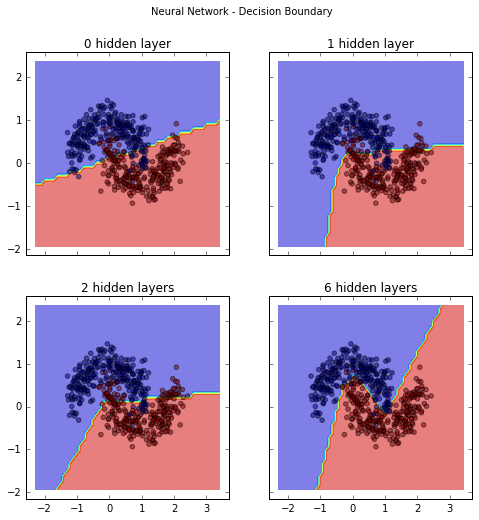

In [5]:


%matplotlib inline
from sknn.mlp import Classifier, Layer
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from itertools import product


X,y= datasets.make_moons(n_samples=500, noise=.2, random_state=222)
from sklearn.datasets import make_blobs
 
net1 = Classifier(
   layers=[
       Layer("Softmax")],random_state=222,
   learning_rate=0.01,
   n_iter=100)
net2 = Classifier(
   layers=[
       Layer("Rectifier", units=4),
       Layer("Softmax")],random_state=12,
   learning_rate=0.01,
   n_iter=100)
net3 =Classifier(
   layers=[
       Layer("Rectifier", units=4),
       Layer("Rectifier", units=4),
       Layer("Softmax")],random_state=22,
   learning_rate=0.01,
   n_iter=100)
net4 =Classifier(
   layers=[
       Layer("Rectifier", units=4),
       Layer("Rectifier", units=4),
       Layer("Rectifier", units=4),
       Layer("Rectifier", units=4),
       Layer("Rectifier", units=4),
       Layer("Rectifier", units=4),
       Layer("Softmax")],random_state=62,
   learning_rate=0.01,
   n_iter=100)
 
net1.fit(X, y)
net2.fit(X, y)
net3.fit(X, y)
net4.fit(X, y)
 
 
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))
 
f, arxxx = plt.subplots(2, 2, sharey='row',sharex='col', figsize=(8, 8))
plt.suptitle('Neural Network - Decision Boundary')
for idx, clf, ti in zip(product([0, 1], [0, 1]),
                       [net1, net2, net3,net4],
                       ['0 hidden layer', '1 hidden layer',
                        '2 hidden layers','6 hidden layers']):
 
   Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)

   arxxx[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.5)
   arxxx[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
   arxxx[idx[0], idx[1]].set_title(ti)
 
plt.show()

Deep learning with H2o

In [ ]:
import sys  
import h2o  
h2o.init() 

h2o.cluster_info()

train_url ="https://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/train.csv.gz"
test_url="https://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/test.csv.gz"


train=h2o.import_file(train_url)
test=h2o.import_file(test_url)

train.describe()
test.describe()


y='C785'
x=train.names[0:784]
train[y]=train[y].asfactor()
test[y]=test[y].asfactor()

from h2o.estimators.deeplearning import H2ODeepLearningEstimator

model_cv=H2ODeepLearningEstimator(distribution='multinomial'
                                 ,activation='RectifierWithDropout',hidden=[32,32,32],
                                        input_dropout_ratio=.2,
                                        sparse=True,
                                        l1=.0005,
                                            epochs=5)
                                            
model_cv.train(x=x,y=y,training_frame=train,nfolds=3)
print model_cv

print model_cv.scoring_history()


model_cv.train(x=x,y=y,training_frame=train,validation_frame=test,nfolds=3)
print model_cv 



h2o and gridsearch

In [ ]:
#h2o & gridsearch
hidden_opt = [[18,18],[32,32],[32,32,32],[100,100,100]]
hyper_parameters = {"hidden":hidden_opt}

#important: here we specify the search parameters
#be careful with these, the training time can explode (see max_models)
search_c = {"strategy":"RandomDiscrete",

"max_models":10, "max_runtime_secs":100,

"seed":222}


from h2o.grid.grid_search import H2OGridSearch

model_grid = H2OGridSearch(H2ODeepLearningEstimator, hyper_params=hyper_parameters)

model_grid.train(x=x, y=y, distribution="multinomial", epochs=1000, training_frame=train, validation_frame=test,
	score_interval=2, stopping_rounds=3, stopping_tolerance=0.05,search_criteria=search_c)

print model_grid

h2o.shutdown(prompt=False)

# Deep Learning and unsupervised pretraining (THEANETS)

Neural networks with Theanets 

In [2]:



import climate # This package provides the reporting of iterations 
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import theanets
import theano
import numpy as np
import matplotlib.pyplot as plt
import climate
from sklearn.cross_validation import train_test_split
import theanets
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import datasets
climate.enable_default_logging()

digits = datasets.load_digits()
digits = datasets.load_digits()
X = np.asarray(digits.data, 'float32')

Y = digits.target

Y=np.array(Y, dtype=np.int32)
#X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scaling

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=0)



# Build a classifier model with 64 inputs, 1 hidden layer with 100 units  and 10 outputs.
net = theanets.Classifier([64,100,10])
N=10
# Train the model using Resilient backpropagation and momentum.
net.train([X_train,y_train], algo='sgd', learning_rate=.001, momentum=0.9,patience=0,
validate_every=N,
min_improvement=0.8)

# Show confusion matrices on the training/validation splits.
print(confusion_matrix(y_test, net.predict(X_test)))
print (accuracy_score(y_test, net.predict(X_test)))

 

Couldn't import dot_parser, loading of dot files will not be possible.
I 2016-07-23 06:11:28 theanets.layers.base:371 layer Input "in": 64 inputs
I 2016-07-23 06:11:28 theanets.layers.base:207 layer Feedforward "hid1": (in:out)64 -> 100, relu, 6500 parameters
I 2016-07-23 06:11:28 theanets.layers.base:207 layer Feedforward "out": (hid1:out)100 -> 10, softmax, 1010 parameters
I 2016-07-23 06:11:28 theanets.graph:91 network has 7510 total parameters
I 2016-07-23 06:11:28 downhill.dataset:174 valid: 45 of 45 mini-batches from (1437, 64); (1437,)
I 2016-07-23 06:11:28 downhill.dataset:174 train: 45 of 45 mini-batches from (1437, 64); (1437,)
I 2016-07-23 06:11:28 theanets.graph:444 building computation graph
I 2016-07-23 06:11:28 theanets.losses:67 using loss: 1.0 * CrossEntropy (output out:out)
I 2016-07-23 06:11:28 downhill.base:389 -- patience = 0
I 2016-07-23 06:11:28 downhill.base:390 -- validate_every = 10
I 2016-07-23 06:11:28 downhill.base:391 -- max_updates = None
I 2016-07-23 06:

Autoencoders 

In [3]:
model = theanets.Autoencoder([64,(45,'relu'),(45,'relu'),(45,'relu'),(45,'relu'),(45,'relu'),64])
dAE_model=model.train([X_train],algo='rmsprop',input_noise=0.1,hidden_l1=.001,sparsity=0.9,num_updates=1000)
X_dAE=model.encode(X_train)
X_dAE=np.asarray(X_dAE, 'float32')
X_dAE.shape


net = theanets.Classifier(layers=(45,45,45,10))
autoe=net.train([X_dAE, y_train], algo='rmsprop',learning_rate=.0001,batch_size=110,min_improvement=.8,momentum=.9,
nesterov=True,num_updates=1000)

dAE_model=model.train([X_test],algo='rmsprop',input_noise=0.1,hidden_l1=.001,sparsity=0.9,momentum=0.9,patience=0,validate_every=N,
min_improvement=0.8)
X_dAE2=model.encode(X_test)
X_dAE2=np.asarray(X_dAE2, 'float32')

#now watch how the higher accuracy of the neural network WITH autoencoders (.975 vs .961).
final=net.predict(X_dAE2)
from sklearn.metrics import accuracy_score
print accuracy_score(final,y_test)  

I 2016-07-23 06:29:18 theanets.layers.base:371 layer Input "in": 64 inputs
I 2016-07-23 06:29:18 theanets.layers.base:207 layer Feedforward "hid1": (in:out)64 -> 45, relu, 2925 parameters
I 2016-07-23 06:29:18 theanets.layers.base:207 layer Feedforward "hid2": (hid1:out)45 -> 45, relu, 2070 parameters
I 2016-07-23 06:29:18 theanets.layers.base:207 layer Feedforward "hid3": (hid2:out)45 -> 45, relu, 2070 parameters
I 2016-07-23 06:29:18 theanets.layers.base:207 layer Feedforward "hid4": (hid3:out)45 -> 45, relu, 2070 parameters
I 2016-07-23 06:29:18 theanets.layers.base:207 layer Feedforward "hid5": (hid4:out)45 -> 45, relu, 2070 parameters
I 2016-07-23 06:29:18 theanets.layers.base:207 layer Feedforward "out": (hid5:out)45 -> 64, linear, 2944 parameters
I 2016-07-23 06:29:18 theanets.graph:91 network has 14149 total parameters
I 2016-07-23 06:29:18 downhill.dataset:174 valid: 45 of 45 mini-batches from (1437, 64)
I 2016-07-23 06:29:18 downhill.dataset:174 train: 45 of 45 mini-batches f